In [1]:
import numpy as np
import pandas
import re
from copy import deepcopy
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import time
import collections
import pickle

In [2]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans,DBSCAN
import hdbscan

In [106]:
class cluster_model:
    def __init__(self,name):
        self.name=name
    
    def reduce_pca(self,X,n_components):
        self.pca_model = PCA(n_components=n_components)
        self.pca_features = self.pca_model.fit_transform(X)
        self.pca_components = self.pca_model.components_
        
    def plot_pca_var(self,dpi=None):
        plt.figure(dpi=dpi)
        plt.plot(np.cumsum(self.pca_model.explained_variance_ratio_))
        plt.title('Principal Component Analysis')
        plt.xlabel('number of features')
        plt.ylabel('cumulative explained variance')
        plt.show();
        
    def plot_km_score(self,k_list):
        SSEs = []
        sil = []
        for k in k_list:
            km = KMeans(n_clusters=k, random_state=42, max_iter=100, n_jobs=-1)
            km.fit(self.pca_features)
            labels = km.labels_
            try:
                sil_score = silhouette_score(self.clustered_features,self.clustered_clusters)
            except:
                sil_score = 0
            SSEs.append(km.inertia_) 
            sil.append(sil_score)
        fig=plt.figure(figsize=(10,6),dpi=100)
        ax1=fig.add_subplot(2,2,1)
        ax1.plot(k_list, SSEs,)
        ax1.set_xlabel('number of clusters')
        ax1.set_ylabel('SSE')
        ax2=fig.add_subplot(2,2,2)
        ax2.plot(k_list,sil)
        ax2.set_xlabel('number of clusters')
        ax2.set_ylabel('silhouette score')
        plt.tight_layout()
        plt.show();        
    
    def get_clusters(self,cluster_model):
        self.cluster_model = cluster_model
        self.clusters = cluster_model.fit_predict(self.pca_features)
        
    def cluster_info(self):
        self.cluster_counts = collections.Counter(self.clusters)
        clustered_idx = (self.clusters!=-1)
        self.clustered_features = self.pca_features[clustered_idx,:]
        self.clustered_clusters = self.clusters[clustered_idx]
        try:
            self.sil_score = silhouette_score(self.clustered_features,self.clustered_clusters)
        except:
            self.sil_score = 'cannot compute silhouette score'
        print(self.name)
        print('unclustered count = '+str(self.cluster_counts[-1]))
        print('number of clusters = '+str(max(self.cluster_counts.keys())+1))
        print('sil score = ' +str(self.sil_score))
        print('---------------------------')
    
    def tsne_viz(self,perplexity,n_iter):
        '''run after cluster_info()
            perplexity between 5 and 50
        '''
        self.tsne_model = TSNE(n_components=2,perplexity=perplexity,n_iter=n_iter,verbose=1)
        self.tsne_embeddings = self.tsne_model.fit_transform(self.clustered_features)
        cluster_count = max(collections.Counter(self.clustered_clusters).keys())+1
        palette = np.array(sns.color_palette("hls", cluster_count))
        cluster_id = self.clustered_clusters

        f = plt.figure(figsize=(8, 8))
        ax = plt.subplot(aspect='equal')
        sc = ax.scatter(self.tsne_embeddings[:,0], self.tsne_embeddings[:,1], lw=0, s=40,c=palette[cluster_id])
        ax.axis('off')
        ax.axis('tight')
        plt.title('t-SNE clusters')
        plt.show();
    
    def to_pickle(self):
        pickle.dump(self,open('pickles/'+self.name+'.pkl','wb'))

In [137]:
model_class_filt5_pca90 = cluster_model('class_filt5_pca90')
model_class_filt5_pca90.reduce_pca(df_join_class_filt5.iloc[:,1:],0.9)
model_class_filt5_pca80 = cluster_model('class_filt5_pca80')
model_class_filt5_pca80.reduce_pca(df_join_class_filt5.iloc[:,1:],0.8)
model_class_filt5_pca50n = cluster_model('class_filt5_pca50n')
model_class_filt5_pca50n.reduce_pca(df_join_class_filt5.iloc[:,1:],50)

model_superclass_filt5_pca90 = cluster_model('superclass_filt5_pca90')
model_superclass_filt5_pca90.reduce_pca(df_join_superclass_filt5.iloc[:,1:],0.9)
model_superclass_filt5_pca80 = cluster_model('superclass_filt5_pca80')
model_superclass_filt5_pca80.reduce_pca(df_join_superclass_filt5.iloc[:,1:],0.8)
model_superclass_filt5_pca50n = cluster_model('superclass_filt5_pca50n')
model_superclass_filt5_pca50n.reduce_pca(df_join_superclass_filt5.iloc[:,1:],50)

model_class_filt10_pca90 = cluster_model('class_filt10_pca90')
model_class_filt10_pca90.reduce_pca(df_join_class_filt10.iloc[:,1:],0.9)
model_class_filt10_pca80 = cluster_model('class_filt10_pca80')
model_class_filt10_pca80.reduce_pca(df_join_class_filt10.iloc[:,1:],0.8)
model_class_filt10_pca50n = cluster_model('class_filt10_pca50n')
model_class_filt10_pca50n.reduce_pca(df_join_class_filt10.iloc[:,1:],50)

model_superclass_filt10_pca90 = cluster_model('superclass_filt10_pca90')
model_superclass_filt10_pca90.reduce_pca(df_join_superclass_filt10.iloc[:,1:],0.9)
model_superclass_filt10_pca80 = cluster_model('superclass_filt10_pca80')
model_superclass_filt10_pca80.reduce_pca(df_join_superclass_filt10.iloc[:,1:],0.8)
model_superclass_filt10_pca50n = cluster_model('superclass_filt10_pca50n')
model_superclass_filt10_pca50n.reduce_pca(df_join_superclass_filt10.iloc[:,1:],50)

In [136]:
df_join_class_filt5 = pickle.load(open('pickles/df_join_class_filt5.pkl', 'rb'))
model_class_filt5_pca90 = pickle.load(open('pickles/class_filt5_pca90.pkl', 'rb'))
model_class_filt5_pca80 = pickle.load(open('pickles/class_filt5_pca80.pkl', 'rb'))
model_class_filt5_pca50n = pickle.load(open('pickles/class_filt5_pca50n.pkl', 'rb'))
df_join_class_filt10 = pickle.load(open('pickles/df_join_class_filt10.pkl', 'rb'))
model_class_filt10_pca90 = pickle.load(open('pickles/class_filt10_pca90.pkl', 'rb'))
model_class_filt10_pca80 = pickle.load(open('pickles/class_filt10_pca80.pkl', 'rb'))
model_class_filt10_pca50n = pickle.load(open('pickles/class_filt10_pca50n.pkl', 'rb'))
df_join_superclass_filt5 = pickle.load(open('pickles/df_join_superclass_filt5.pkl', 'rb'))
model_superclass_filt5_pca90 = pickle.load(open('pickles/superclass_filt5_pca90.pkl', 'rb'))
model_superclass_filt5_pca80 = pickle.load(open('pickles/superclass_filt5_pca80.pkl', 'rb'))
model_superclass_filt5_pca50n = pickle.load(open('pickles/superclass_filt5_pca50n.pkl', 'rb'))
df_join_superclass_filt10 = pickle.load(open('pickles/df_join_superclass_filt10.pkl', 'rb'))
model_superclass_filt10_pca90 = pickle.load(open('pickles/superclass_filt10_pca90.pkl', 'rb'))
model_superclass_filt10_pca80 = pickle.load(open('pickles/superclass_filt10_pca80.pkl', 'rb'))
model_superclass_filt10_pca50n = pickle.load(open('pickles/superclass_filt10_pca50n.pkl', 'rb'))

EOFError: Ran out of input

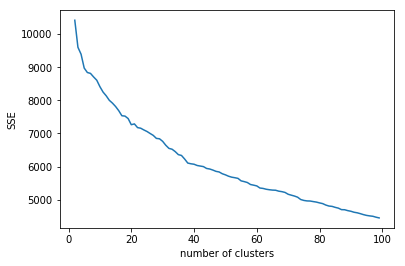

In [99]:
model_class_filt5_pca90.plot_km_score(list(np.arange(2,100)))

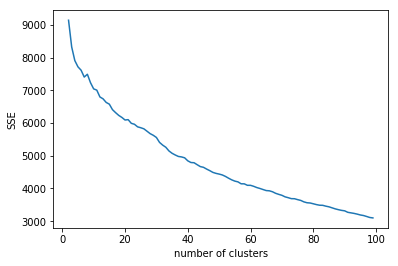

In [100]:
model_class_filt5_pca80.plot_km_score(list(np.arange(2,100)))

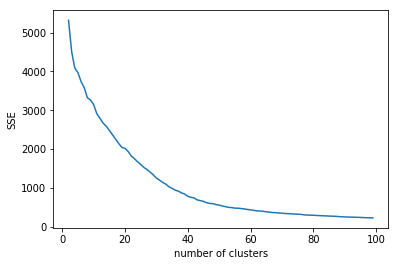

In [136]:
model_class_filt5_pca50n.plot_km_score(list(np.arange(2,100)))

In [5]:
np.cumsum(model_class_filt5_pca50n.pca_model.explained_variance_ratio_)

array([0.08868882, 0.1482385 , 0.18013711, 0.19629472, 0.2118037 ,
       0.22682358, 0.24074658, 0.25305513, 0.26413583, 0.27475362,
       0.28497109, 0.29494811, 0.30442926, 0.31365543, 0.32268543,
       0.33166262, 0.34010839, 0.34791992, 0.35561764, 0.36259167,
       0.36920474, 0.37570247, 0.38193219, 0.38779481, 0.39361294,
       0.39929852, 0.40466791, 0.40989495, 0.41503605, 0.42000152,
       0.42488435, 0.42971981, 0.43445873, 0.43906338, 0.44357236,
       0.44794389, 0.45218493, 0.45638784, 0.46038482, 0.46436553,
       0.46821832, 0.4720335 , 0.4758135 , 0.47942953, 0.48297752,
       0.48647077, 0.48993709, 0.49326663, 0.49651344, 0.4996896 ])

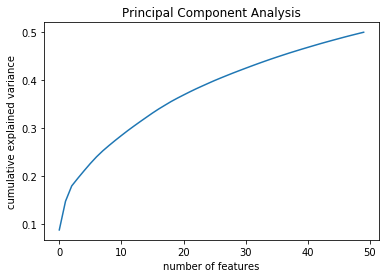

In [22]:
model_class_filt5_pca50n.plot_pca_var()

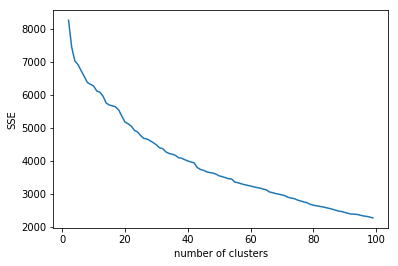

In [148]:
model_class_filt10_pca90.plot_km_score(list(np.arange(2,100)))

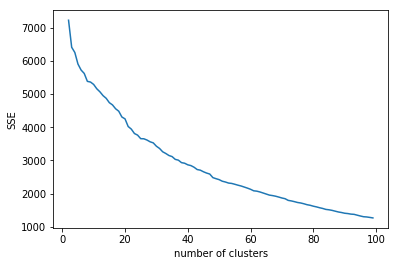

In [149]:
model_class_filt10_pca80.plot_km_score(list(np.arange(2,100)))

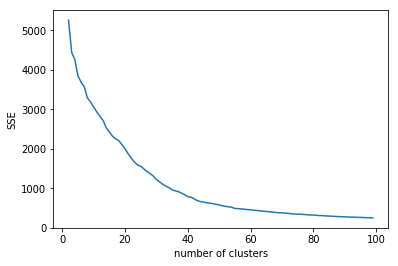

In [150]:
model_class_filt10_pca50n.plot_km_score(list(np.arange(2,100)))

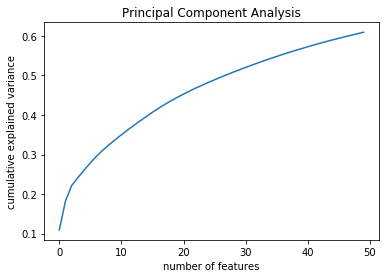

In [23]:
model_class_filt10_pca50n.plot_pca_var()

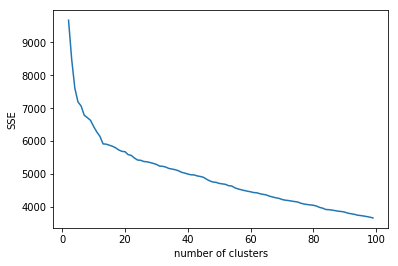

In [123]:
model_superclass_filt5_pca90.plot_km_score(list(np.arange(2,100)))

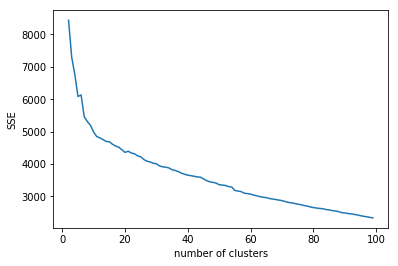

In [124]:
model_superclass_filt5_pca80.plot_km_score(list(np.arange(2,100)))

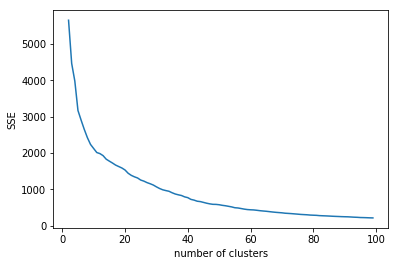

In [125]:
model_superclass_filt5_pca50n.plot_km_score(list(np.arange(2,100)))

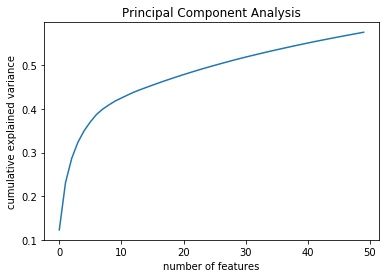

In [24]:
model_superclass_filt5_pca50n.plot_pca_var()

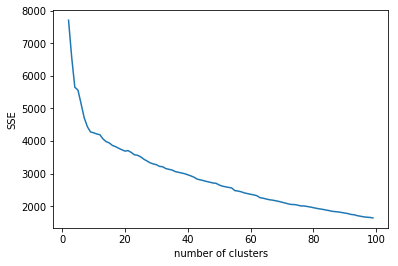

In [152]:
model_superclass_filt10_pca90.plot_km_score(list(np.arange(2,100)))

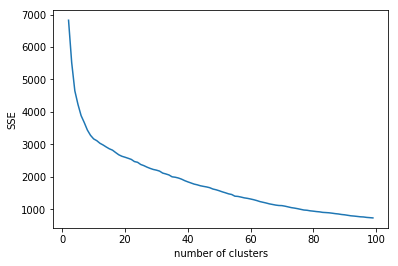

In [153]:
model_superclass_filt10_pca80.plot_km_score(list(np.arange(2,100)))

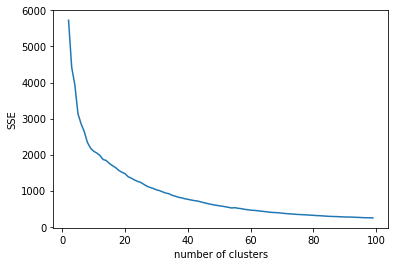

In [154]:
model_superclass_filt10_pca50n.plot_km_score(list(np.arange(2,100)))

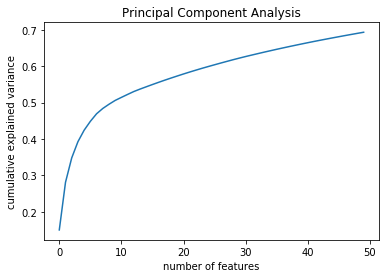

In [25]:
model_superclass_filt10_pca50n.plot_pca_var()

In [147]:
[x for x in dir() if re.search(r'model_',x)!=None]

['model_class_filt10_pca50n',
 'model_class_filt10_pca80',
 'model_class_filt10_pca90',
 'model_class_filt5_pca50n',
 'model_class_filt5_pca80',
 'model_class_filt5_pca90',
 'model_superclass_filt10_pca50n',
 'model_superclass_filt10_pca80',
 'model_superclass_filt10_pca90',
 'model_superclass_filt5_pca50n',
 'model_superclass_filt5_pca80',
 'model_superclass_filt5_pca90']

class_filt10_pca50n
unclustered count = 472
number of clusters = 516
sil score = 0.9040845712074089
---------------------------
[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 5334 samples in 0.009s...
[t-SNE] Computed neighbors for 5334 samples in 0.350s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5334
[t-SNE] Computed conditional probabilities for sample 2000 / 5334
[t-SNE] Computed conditional probabilities for sample 3000 / 5334
[t-SNE] Computed conditional probabilities for sample 4000 / 5334
[t-SNE] Computed conditional probabilities for sample 5000 / 5334
[t-SNE] Computed conditional probabilities for sample 5334 / 5334
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 64.462906
[t-SNE] Error after 1000 iterations: 0.313468


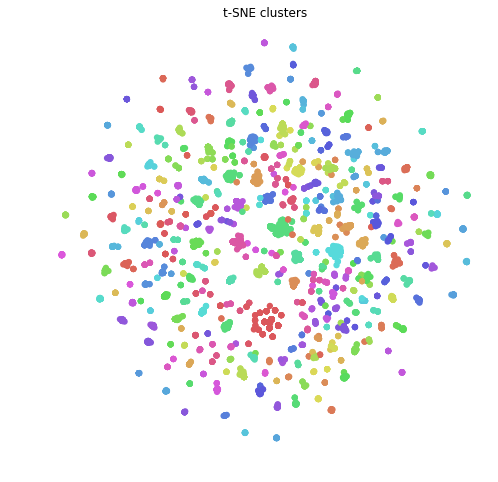

/home/ubuntu/.local/lib/python3.5/site-packages/sklearn/metrics/cluster/unsupervised.py:205: RuntimeWarning: invalid value encountered in true_divide
  sil_samples /= np.maximum(intra_clust_dists, inter_clust_dists)


class_filt10_pca80
unclustered count = 404
number of clusters = 637
sil score = nan
---------------------------
[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 5402 samples in 0.017s...
[t-SNE] Computed neighbors for 5402 samples in 1.191s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5402
[t-SNE] Computed conditional probabilities for sample 2000 / 5402
[t-SNE] Computed conditional probabilities for sample 3000 / 5402
[t-SNE] Computed conditional probabilities for sample 4000 / 5402
[t-SNE] Computed conditional probabilities for sample 5000 / 5402
[t-SNE] Computed conditional probabilities for sample 5402 / 5402
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 65.022400
[t-SNE] Error after 1000 iterations: 0.324089


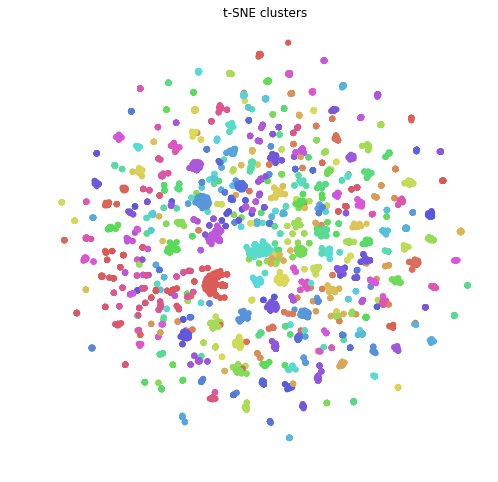

/home/ubuntu/.local/lib/python3.5/site-packages/sklearn/metrics/cluster/unsupervised.py:205: RuntimeWarning: invalid value encountered in true_divide
  sil_samples /= np.maximum(intra_clust_dists, inter_clust_dists)


class_filt10_pca90
unclustered count = 404
number of clusters = 631
sil score = nan
---------------------------
[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 5402 samples in 0.025s...
[t-SNE] Computed neighbors for 5402 samples in 2.195s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5402
[t-SNE] Computed conditional probabilities for sample 2000 / 5402
[t-SNE] Computed conditional probabilities for sample 3000 / 5402
[t-SNE] Computed conditional probabilities for sample 4000 / 5402
[t-SNE] Computed conditional probabilities for sample 5000 / 5402
[t-SNE] Computed conditional probabilities for sample 5402 / 5402
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 64.540543
[t-SNE] Error after 1000 iterations: 0.339240


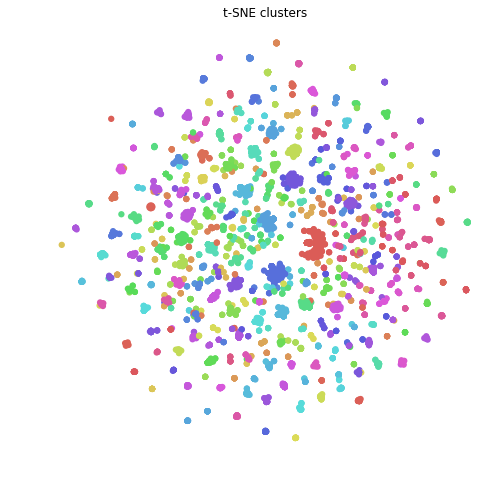

class_filt5_pca50n
unclustered count = 934
number of clusters = 776
sil score = 0.8805441166709599
---------------------------
[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 4872 samples in 0.007s...
[t-SNE] Computed neighbors for 4872 samples in 0.373s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4872
[t-SNE] Computed conditional probabilities for sample 2000 / 4872
[t-SNE] Computed conditional probabilities for sample 3000 / 4872
[t-SNE] Computed conditional probabilities for sample 4000 / 4872
[t-SNE] Computed conditional probabilities for sample 4872 / 4872
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 66.212006
[t-SNE] Error after 1000 iterations: 0.330827


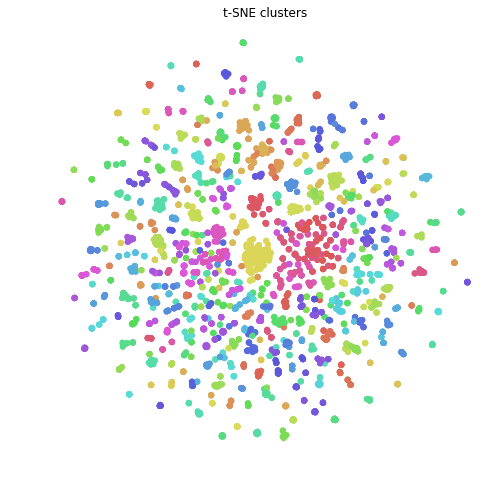

/home/ubuntu/.local/lib/python3.5/site-packages/sklearn/metrics/cluster/unsupervised.py:205: RuntimeWarning: invalid value encountered in true_divide
  sil_samples /= np.maximum(intra_clust_dists, inter_clust_dists)


class_filt5_pca80
unclustered count = 812
number of clusters = 979
sil score = nan
---------------------------
[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 4994 samples in 0.029s...
[t-SNE] Computed neighbors for 4994 samples in 3.720s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4994
[t-SNE] Computed conditional probabilities for sample 2000 / 4994
[t-SNE] Computed conditional probabilities for sample 3000 / 4994
[t-SNE] Computed conditional probabilities for sample 4000 / 4994
[t-SNE] Computed conditional probabilities for sample 4994 / 4994
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 67.611862
[t-SNE] Error after 1000 iterations: 0.395695


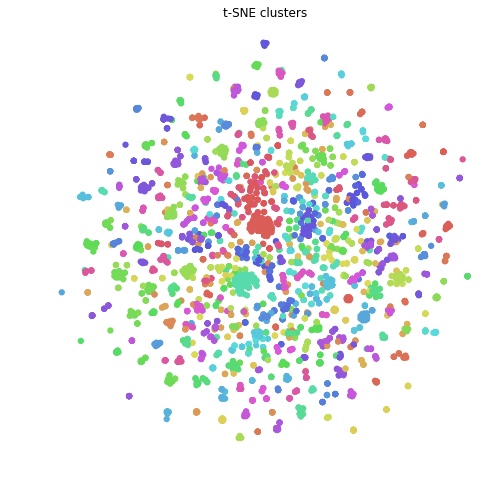

/home/ubuntu/.local/lib/python3.5/site-packages/sklearn/metrics/cluster/unsupervised.py:205: RuntimeWarning: invalid value encountered in true_divide
  sil_samples /= np.maximum(intra_clust_dists, inter_clust_dists)


class_filt5_pca90
unclustered count = 844
number of clusters = 973
sil score = nan
---------------------------
[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 4962 samples in 0.052s...
[t-SNE] Computed neighbors for 4962 samples in 7.103s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4962
[t-SNE] Computed conditional probabilities for sample 2000 / 4962
[t-SNE] Computed conditional probabilities for sample 3000 / 4962
[t-SNE] Computed conditional probabilities for sample 4000 / 4962
[t-SNE] Computed conditional probabilities for sample 4962 / 4962
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 68.035881
[t-SNE] Error after 1000 iterations: 0.410604


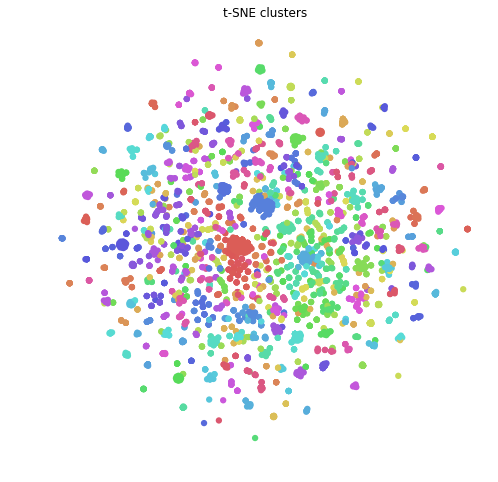

superclass_filt10_pca50n
unclustered count = 356
number of clusters = 475
sil score = 0.9448554503404374
---------------------------
[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 5450 samples in 0.008s...
[t-SNE] Computed neighbors for 5450 samples in 0.367s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5450
[t-SNE] Computed conditional probabilities for sample 2000 / 5450
[t-SNE] Computed conditional probabilities for sample 3000 / 5450
[t-SNE] Computed conditional probabilities for sample 4000 / 5450
[t-SNE] Computed conditional probabilities for sample 5000 / 5450
[t-SNE] Computed conditional probabilities for sample 5450 / 5450
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 67.025063
[t-SNE] Error after 1000 iterations: 0.577622


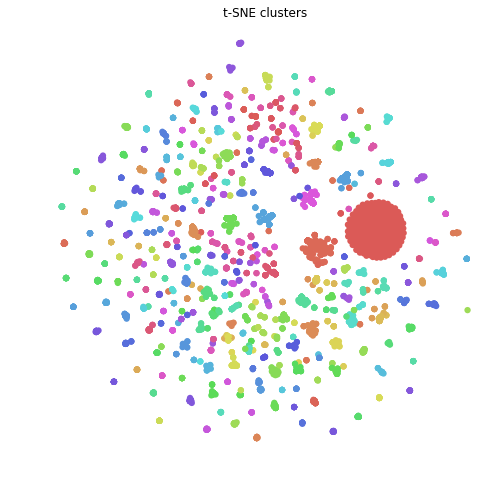

/home/ubuntu/.local/lib/python3.5/site-packages/sklearn/metrics/cluster/unsupervised.py:205: RuntimeWarning: invalid value encountered in true_divide
  sil_samples /= np.maximum(intra_clust_dists, inter_clust_dists)


superclass_filt10_pca80
unclustered count = 337
number of clusters = 580
sil score = nan
---------------------------
[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 5469 samples in 0.014s...
[t-SNE] Computed neighbors for 5469 samples in 0.751s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5469
[t-SNE] Computed conditional probabilities for sample 2000 / 5469
[t-SNE] Computed conditional probabilities for sample 3000 / 5469
[t-SNE] Computed conditional probabilities for sample 4000 / 5469
[t-SNE] Computed conditional probabilities for sample 5000 / 5469
[t-SNE] Computed conditional probabilities for sample 5469 / 5469
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 67.826988
[t-SNE] Error after 1000 iterations: 0.632256


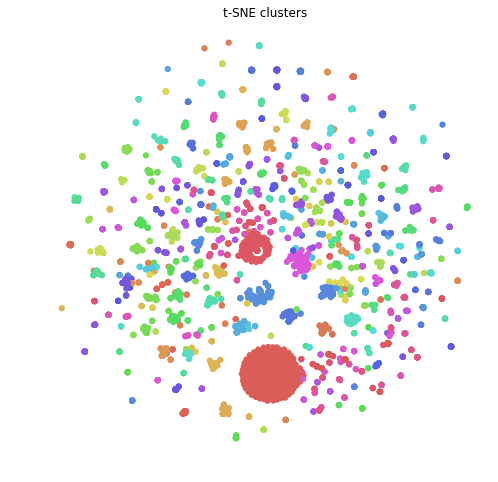

/home/ubuntu/.local/lib/python3.5/site-packages/sklearn/metrics/cluster/unsupervised.py:205: RuntimeWarning: invalid value encountered in true_divide
  sil_samples /= np.maximum(intra_clust_dists, inter_clust_dists)


superclass_filt10_pca90
unclustered count = 344
number of clusters = 574
sil score = nan
---------------------------
[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 5462 samples in 0.022s...
[t-SNE] Computed neighbors for 5462 samples in 1.411s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5462
[t-SNE] Computed conditional probabilities for sample 2000 / 5462
[t-SNE] Computed conditional probabilities for sample 3000 / 5462
[t-SNE] Computed conditional probabilities for sample 4000 / 5462
[t-SNE] Computed conditional probabilities for sample 5000 / 5462
[t-SNE] Computed conditional probabilities for sample 5462 / 5462
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 68.729340
[t-SNE] Error after 1000 iterations: 0.663927


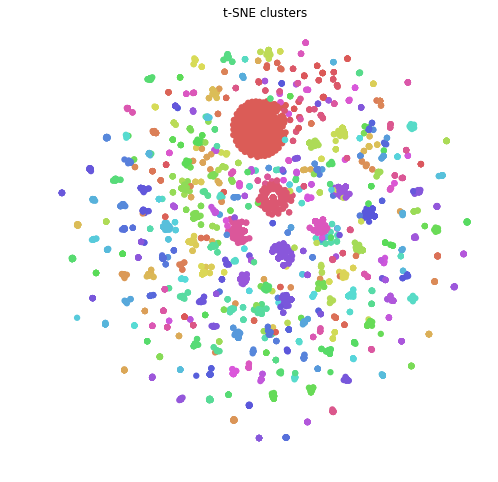

superclass_filt5_pca50n
unclustered count = 884
number of clusters = 753
sil score = 0.8909596331726747
---------------------------
[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 4922 samples in 0.007s...
[t-SNE] Computed neighbors for 4922 samples in 0.352s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4922
[t-SNE] Computed conditional probabilities for sample 2000 / 4922
[t-SNE] Computed conditional probabilities for sample 3000 / 4922
[t-SNE] Computed conditional probabilities for sample 4000 / 4922
[t-SNE] Computed conditional probabilities for sample 4922 / 4922
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 66.056091
[t-SNE] Error after 1000 iterations: 0.348777


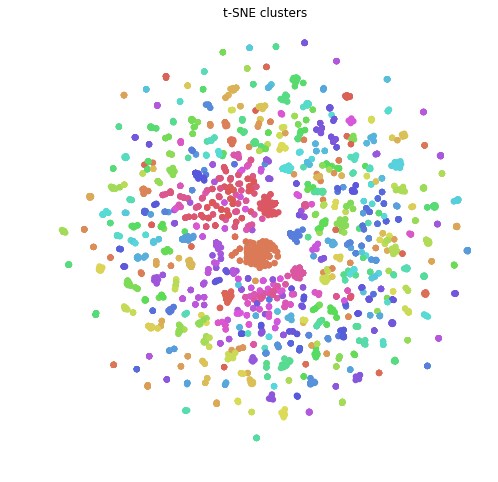

/home/ubuntu/.local/lib/python3.5/site-packages/sklearn/metrics/cluster/unsupervised.py:205: RuntimeWarning: invalid value encountered in true_divide
  sil_samples /= np.maximum(intra_clust_dists, inter_clust_dists)


superclass_filt5_pca80
unclustered count = 741
number of clusters = 964
sil score = nan
---------------------------
[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 5065 samples in 0.025s...
[t-SNE] Computed neighbors for 5065 samples in 2.427s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5065
[t-SNE] Computed conditional probabilities for sample 2000 / 5065
[t-SNE] Computed conditional probabilities for sample 3000 / 5065
[t-SNE] Computed conditional probabilities for sample 4000 / 5065
[t-SNE] Computed conditional probabilities for sample 5000 / 5065
[t-SNE] Computed conditional probabilities for sample 5065 / 5065
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 67.901466
[t-SNE] Error after 1000 iterations: 0.436721


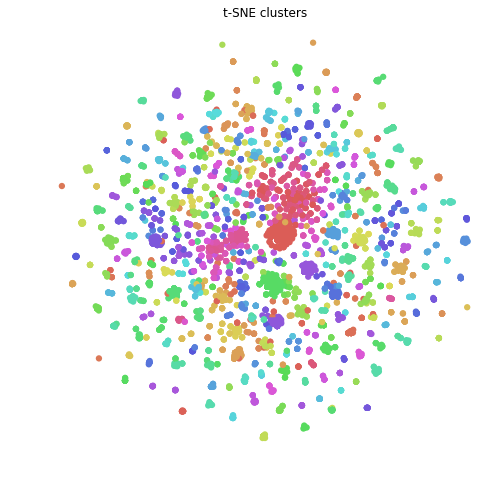

/home/ubuntu/.local/lib/python3.5/site-packages/sklearn/metrics/cluster/unsupervised.py:205: RuntimeWarning: invalid value encountered in true_divide
  sil_samples /= np.maximum(intra_clust_dists, inter_clust_dists)


superclass_filt5_pca90
unclustered count = 726
number of clusters = 957
sil score = nan
---------------------------
[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 5080 samples in 0.044s...
[t-SNE] Computed neighbors for 5080 samples in 4.777s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5080
[t-SNE] Computed conditional probabilities for sample 2000 / 5080
[t-SNE] Computed conditional probabilities for sample 3000 / 5080
[t-SNE] Computed conditional probabilities for sample 4000 / 5080
[t-SNE] Computed conditional probabilities for sample 5000 / 5080
[t-SNE] Computed conditional probabilities for sample 5080 / 5080
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 69.206123
[t-SNE] Error after 1000 iterations: 0.474948


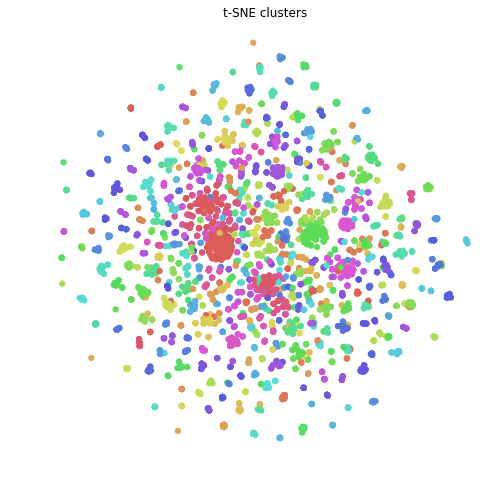

In [30]:
hdbs2 = hdbscan.HDBSCAN(min_cluster_size=2)
for model in [model_class_filt10_pca50n,
             model_class_filt10_pca80,
             model_class_filt10_pca90,
             model_class_filt5_pca50n,
             model_class_filt5_pca80,
             model_class_filt5_pca90,
             model_superclass_filt10_pca50n,
             model_superclass_filt10_pca80,
             model_superclass_filt10_pca90,
             model_superclass_filt5_pca50n,
             model_superclass_filt5_pca80,
             model_superclass_filt5_pca90]:
    model.get_clusters(hdbs2)
    model.cluster_info()
    model.tsne_viz(perplexity=5,n_iter=1000)

In [35]:
hdbs3 = hdbscan.HDBSCAN(min_cluster_size=2)
for model in [model_class_filt10_pca50n,
             model_class_filt10_pca80,
             model_class_filt10_pca90,
             model_class_filt5_pca50n,
             model_class_filt5_pca80,
             model_class_filt5_pca90,
             model_superclass_filt10_pca50n,
             model_superclass_filt10_pca80,
             model_superclass_filt10_pca90,
             model_superclass_filt5_pca50n,
             model_superclass_filt5_pca80,
             model_superclass_filt5_pca90]:
    model.get_clusters(hdbs3)
    model.cluster_info()

class_filt10_pca50n
unclustered count = 472
number of clusters = 516
sil score = 0.9040845712074089
---------------------------


/home/ubuntu/.local/lib/python3.5/site-packages/sklearn/metrics/cluster/unsupervised.py:205: RuntimeWarning: invalid value encountered in true_divide
  sil_samples /= np.maximum(intra_clust_dists, inter_clust_dists)


class_filt10_pca80
unclustered count = 404
number of clusters = 637
sil score = nan
---------------------------


/home/ubuntu/.local/lib/python3.5/site-packages/sklearn/metrics/cluster/unsupervised.py:205: RuntimeWarning: invalid value encountered in true_divide
  sil_samples /= np.maximum(intra_clust_dists, inter_clust_dists)


class_filt10_pca90
unclustered count = 404
number of clusters = 631
sil score = nan
---------------------------
class_filt5_pca50n
unclustered count = 934
number of clusters = 776
sil score = 0.8805441166709599
---------------------------


/home/ubuntu/.local/lib/python3.5/site-packages/sklearn/metrics/cluster/unsupervised.py:205: RuntimeWarning: invalid value encountered in true_divide
  sil_samples /= np.maximum(intra_clust_dists, inter_clust_dists)


class_filt5_pca80
unclustered count = 812
number of clusters = 979
sil score = nan
---------------------------


/home/ubuntu/.local/lib/python3.5/site-packages/sklearn/metrics/cluster/unsupervised.py:205: RuntimeWarning: invalid value encountered in true_divide
  sil_samples /= np.maximum(intra_clust_dists, inter_clust_dists)


class_filt5_pca90
unclustered count = 844
number of clusters = 973
sil score = nan
---------------------------
superclass_filt10_pca50n
unclustered count = 356
number of clusters = 475
sil score = 0.9448554503404374
---------------------------


/home/ubuntu/.local/lib/python3.5/site-packages/sklearn/metrics/cluster/unsupervised.py:205: RuntimeWarning: invalid value encountered in true_divide
  sil_samples /= np.maximum(intra_clust_dists, inter_clust_dists)


superclass_filt10_pca80
unclustered count = 337
number of clusters = 580
sil score = nan
---------------------------


/home/ubuntu/.local/lib/python3.5/site-packages/sklearn/metrics/cluster/unsupervised.py:205: RuntimeWarning: invalid value encountered in true_divide
  sil_samples /= np.maximum(intra_clust_dists, inter_clust_dists)


superclass_filt10_pca90
unclustered count = 344
number of clusters = 574
sil score = nan
---------------------------
superclass_filt5_pca50n
unclustered count = 884
number of clusters = 753
sil score = 0.8909596331726747
---------------------------


/home/ubuntu/.local/lib/python3.5/site-packages/sklearn/metrics/cluster/unsupervised.py:205: RuntimeWarning: invalid value encountered in true_divide
  sil_samples /= np.maximum(intra_clust_dists, inter_clust_dists)


superclass_filt5_pca80
unclustered count = 741
number of clusters = 964
sil score = nan
---------------------------
superclass_filt5_pca90
unclustered count = 726
number of clusters = 957
sil score = nan
---------------------------


/home/ubuntu/.local/lib/python3.5/site-packages/sklearn/metrics/cluster/unsupervised.py:205: RuntimeWarning: invalid value encountered in true_divide
  sil_samples /= np.maximum(intra_clust_dists, inter_clust_dists)


/home/ubuntu/.local/lib/python3.5/site-packages/sklearn/metrics/cluster/unsupervised.py:205: RuntimeWarning: invalid value encountered in true_divide
  sil_samples /= np.maximum(intra_clust_dists, inter_clust_dists)


class_filt10_pca90
unclustered count = 404
number of clusters = 631
sil score = nan
---------------------------
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 5402 samples in 0.025s...
[t-SNE] Computed neighbors for 5402 samples in 6.801s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5402
[t-SNE] Computed conditional probabilities for sample 2000 / 5402
[t-SNE] Computed conditional probabilities for sample 3000 / 5402
[t-SNE] Computed conditional probabilities for sample 4000 / 5402
[t-SNE] Computed conditional probabilities for sample 5000 / 5402
[t-SNE] Computed conditional probabilities for sample 5402 / 5402
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 59.486992
[t-SNE] Error after 5000 iterations: -0.076707


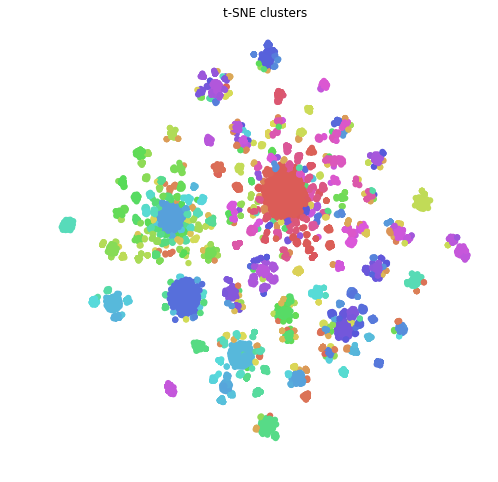

/home/ubuntu/.local/lib/python3.5/site-packages/sklearn/metrics/cluster/unsupervised.py:205: RuntimeWarning: invalid value encountered in true_divide
  sil_samples /= np.maximum(intra_clust_dists, inter_clust_dists)


class_filt10_pca80
unclustered count = 404
number of clusters = 637
sil score = nan
---------------------------
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 5402 samples in 0.017s...
[t-SNE] Computed neighbors for 5402 samples in 4.357s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5402
[t-SNE] Computed conditional probabilities for sample 2000 / 5402
[t-SNE] Computed conditional probabilities for sample 3000 / 5402
[t-SNE] Computed conditional probabilities for sample 4000 / 5402
[t-SNE] Computed conditional probabilities for sample 5000 / 5402
[t-SNE] Computed conditional probabilities for sample 5402 / 5402
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 57.348293
[t-SNE] Error after 5000 iterations: -0.036494


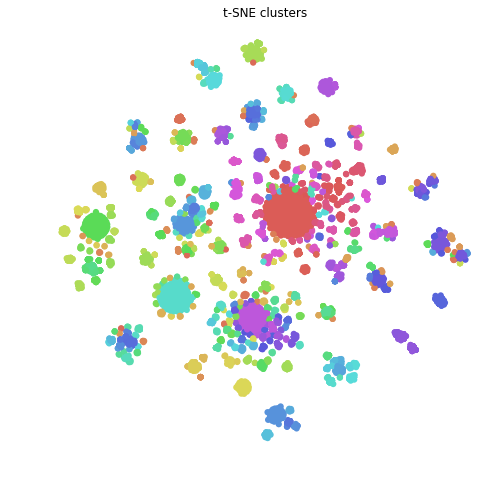

superclass_filt10_pca50n
unclustered count = 356
number of clusters = 475
sil score = 0.9448554503404374
---------------------------
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 5450 samples in 0.009s...
[t-SNE] Computed neighbors for 5450 samples in 1.029s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5450
[t-SNE] Computed conditional probabilities for sample 2000 / 5450
[t-SNE] Computed conditional probabilities for sample 3000 / 5450
[t-SNE] Computed conditional probabilities for sample 4000 / 5450
[t-SNE] Computed conditional probabilities for sample 5000 / 5450
[t-SNE] Computed conditional probabilities for sample 5450 / 5450
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 56.562267
[t-SNE] Error after 5000 iterations: 0.104846


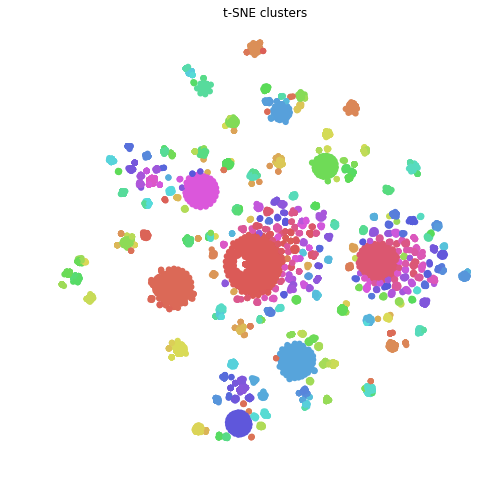

/home/ubuntu/.local/lib/python3.5/site-packages/sklearn/metrics/cluster/unsupervised.py:205: RuntimeWarning: invalid value encountered in true_divide
  sil_samples /= np.maximum(intra_clust_dists, inter_clust_dists)


superclass_filt10_pca80
unclustered count = 337
number of clusters = 580
sil score = nan
---------------------------
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 5469 samples in 0.014s...
[t-SNE] Computed neighbors for 5469 samples in 1.981s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5469
[t-SNE] Computed conditional probabilities for sample 2000 / 5469
[t-SNE] Computed conditional probabilities for sample 3000 / 5469
[t-SNE] Computed conditional probabilities for sample 4000 / 5469
[t-SNE] Computed conditional probabilities for sample 5000 / 5469
[t-SNE] Computed conditional probabilities for sample 5469 / 5469
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 57.472256
[t-SNE] Error after 5000 iterations: 0.259943


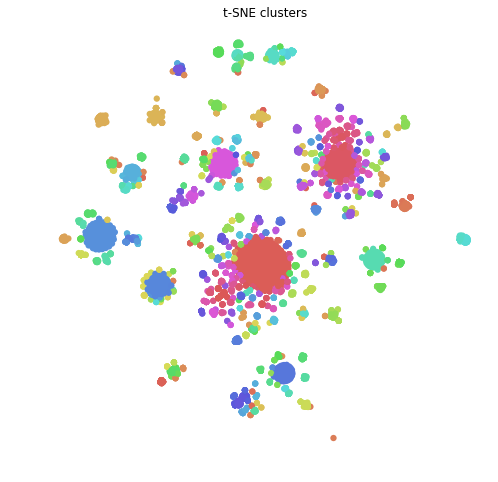

/home/ubuntu/.local/lib/python3.5/site-packages/sklearn/metrics/cluster/unsupervised.py:205: RuntimeWarning: invalid value encountered in true_divide
  sil_samples /= np.maximum(intra_clust_dists, inter_clust_dists)


superclass_filt10_pca90
unclustered count = 344
number of clusters = 574
sil score = nan
---------------------------
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 5462 samples in 0.022s...
[t-SNE] Computed neighbors for 5462 samples in 3.415s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5462
[t-SNE] Computed conditional probabilities for sample 2000 / 5462
[t-SNE] Computed conditional probabilities for sample 3000 / 5462
[t-SNE] Computed conditional probabilities for sample 4000 / 5462
[t-SNE] Computed conditional probabilities for sample 5000 / 5462
[t-SNE] Computed conditional probabilities for sample 5462 / 5462
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 58.347816
[t-SNE] Error after 5000 iterations: 0.248817


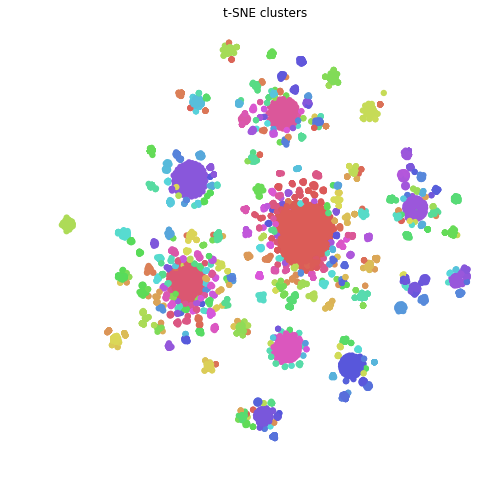

In [33]:
# min_cluster_size 2 appears to be better than min_cluster_size 3 in terms of number unclustered and number of clusters
# try different perplexity and n_iter

hdbs2 = hdbscan.HDBSCAN(min_cluster_size=2)
for model in [model_class_filt10_pca90,
              model_class_filt10_pca80,
              model_superclass_filt10_pca50n,
              model_superclass_filt10_pca80,
              model_superclass_filt10_pca90
             ]:
    model.get_clusters(hdbs2)
    model.cluster_info()
    model.tsne_viz(perplexity=50,n_iter=5000)

In [141]:
for model in [model_class_filt10_pca50n,
             model_class_filt10_pca80,
             model_class_filt10_pca90,
             model_class_filt5_pca50n,
             model_class_filt5_pca80,
             model_class_filt5_pca90,
             model_superclass_filt10_pca50n,
             model_superclass_filt10_pca80,
             model_superclass_filt10_pca90,
             model_superclass_filt5_pca50n,
             model_superclass_filt5_pca80,
             model_superclass_filt5_pca90]:
    model.to_pickle()

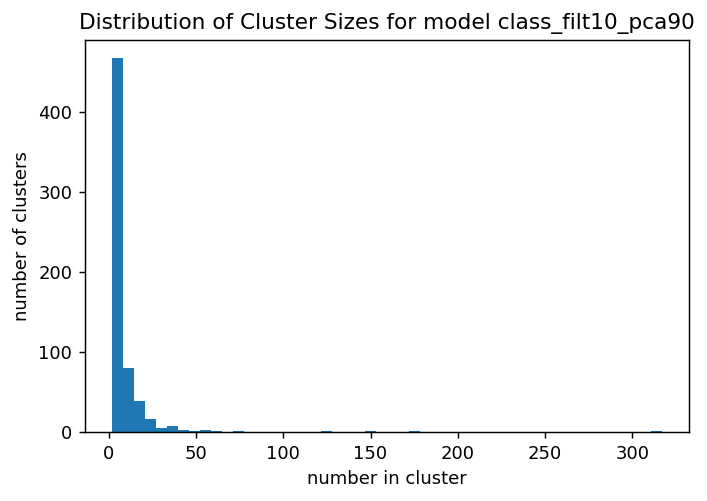

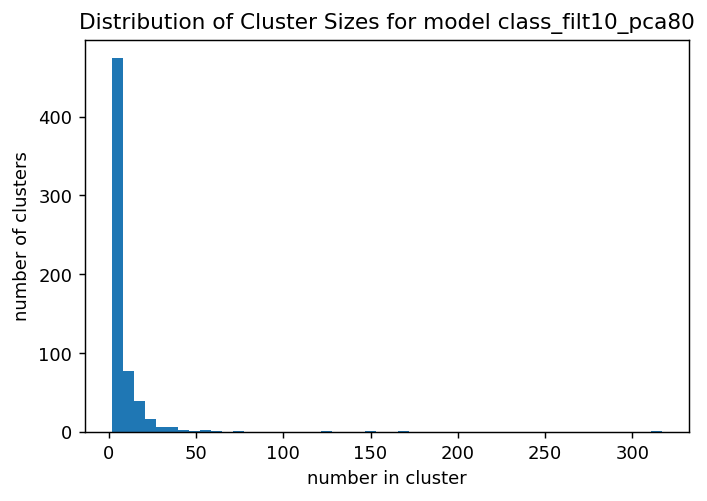

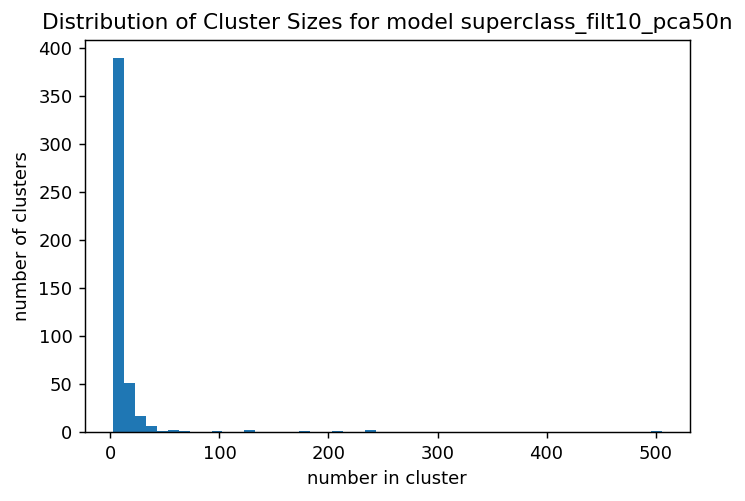

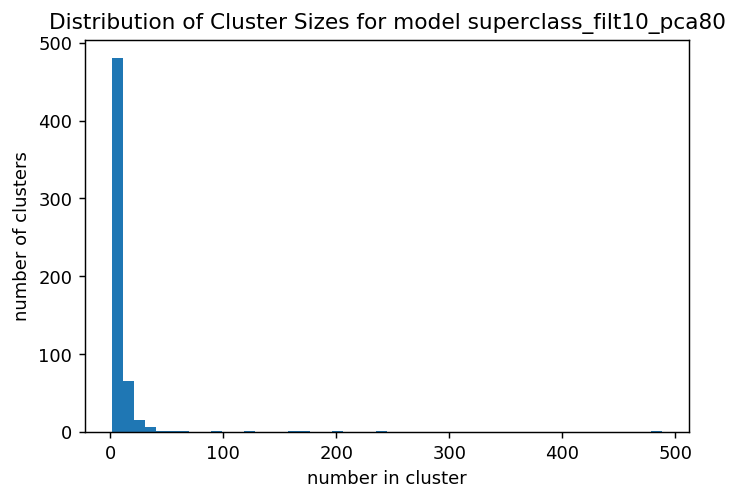

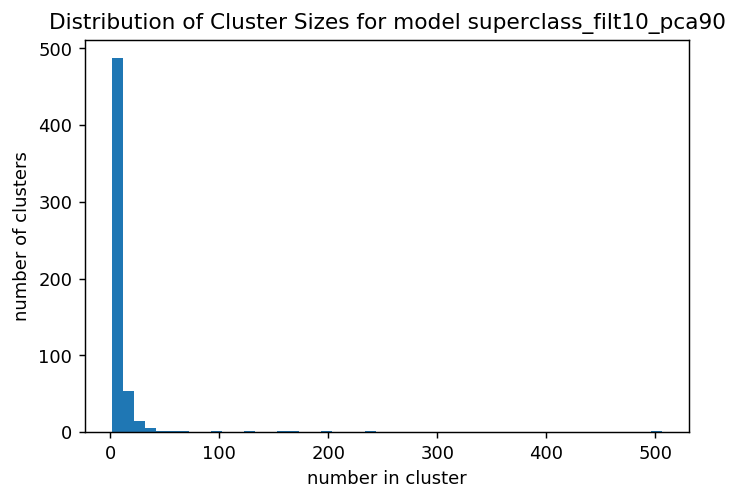

In [53]:
for model in [model_class_filt10_pca90,
              model_class_filt10_pca80,
              model_superclass_filt10_pca50n,
              model_superclass_filt10_pca80,
              model_superclass_filt10_pca90]:
    plt.figure(dpi=130)
    plt.title('Distribution of Cluster Sizes for model '+str(model.name))
    plt.xlabel('number in cluster')
    plt.ylabel('number of clusters')
    plt.hist(list(collections.Counter(model.clustered_clusters).values()),bins=50);

In [55]:
model_class_filt10_pca90.cluster_counts.most_common()

[(-1, 404),
 (629, 317),
 (395, 176),
 (356, 151),
 (337, 126),
 (437, 76),
 (336, 74),
 (242, 64),
 (120, 58),
 (216, 53),
 (406, 53),
 (283, 50),
 (279, 48),
 (450, 46),
 (354, 41),
 (305, 40),
 (458, 39),
 (508, 39),
 (503, 38),
 (486, 37),
 (495, 36),
 (501, 36),
 (166, 35),
 (239, 34),
 (134, 32),
 (197, 32),
 (478, 32),
 (181, 31),
 (371, 30),
 (16, 27),
 (225, 27),
 (301, 26),
 (310, 26),
 (489, 26),
 (493, 26),
 (535, 26),
 (91, 25),
 (387, 25),
 (492, 25),
 (12, 23),
 (260, 23),
 (563, 23),
 (111, 22),
 (506, 22),
 (255, 21),
 (521, 21),
 (118, 20),
 (175, 20),
 (339, 20),
 (472, 20),
 (527, 20),
 (112, 19),
 (186, 19),
 (269, 19),
 (498, 19),
 (519, 19),
 (542, 19),
 (0, 18),
 (194, 18),
 (334, 18),
 (382, 18),
 (531, 18),
 (607, 18),
 (205, 17),
 (213, 17),
 (511, 17),
 (561, 17),
 (1, 16),
 (8, 16),
 (185, 16),
 (256, 16),
 (377, 16),
 (386, 16),
 (392, 16),
 (502, 16),
 (516, 16),
 (586, 16),
 (93, 15),
 (124, 15),
 (130, 15),
 (284, 15),
 (443, 15),
 (445, 15),
 (481, 15)

In [142]:
def cluster_more(model,clusterer,perplexity,n_iter):
    model.get_clusters(clusterer)
    model.cluster_info()
    model.tsne_viz(perplexity=perplexity,n_iter=n_iter)
    print('cluster counts: ' + str(model.cluster_counts))

class_f10_p90_c629


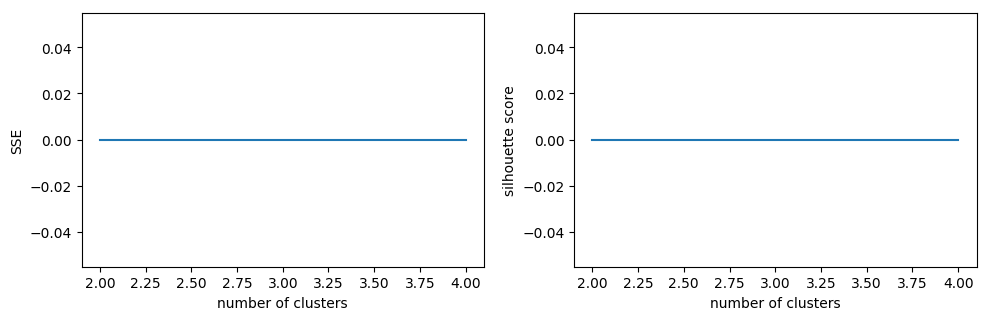

class_f10_p90_c395


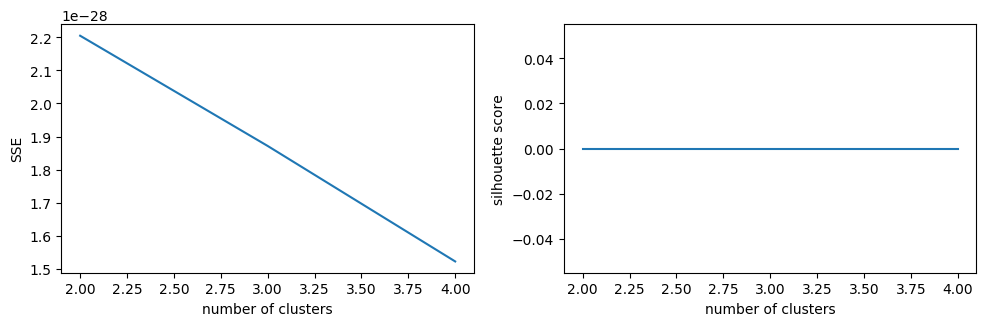

class_f10_p90_c356


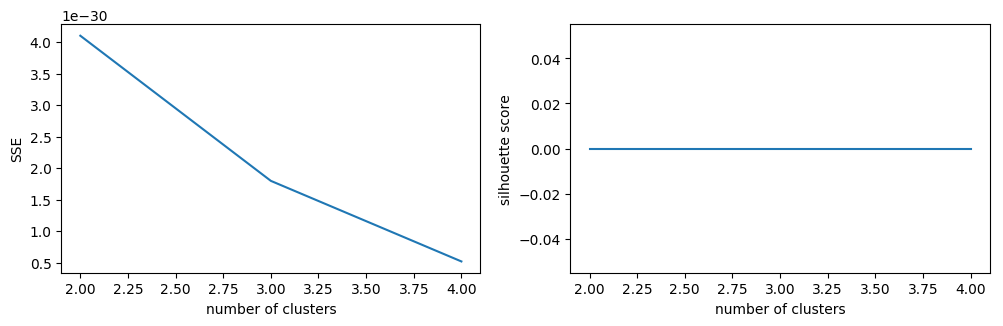

class_f10_p90_c337


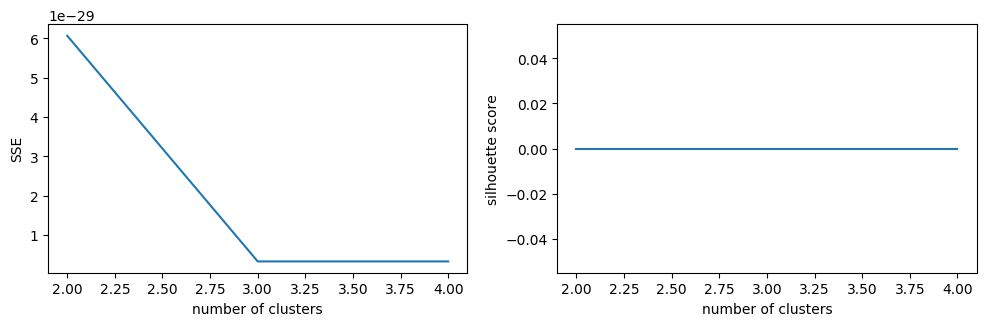

In [143]:
model_class_f10_p90_c629 = cluster_model('class_f10_p90_c629')
model_class_f10_p90_c629.pca_features = model_class_filt10_pca90.pca_features[model_class_filt10_pca90.clusters==629,:]
model_class_f10_p90_c395 = cluster_model('class_f10_p90_c395')
model_class_f10_p90_c395.pca_features = model_class_filt10_pca90.pca_features[model_class_filt10_pca90.clusters==395,:]
model_class_f10_p90_c356 = cluster_model('class_f10_p90_c356')
model_class_f10_p90_c356.pca_features = model_class_filt10_pca90.pca_features[model_class_filt10_pca90.clusters==356,:]
model_class_f10_p90_c337 = cluster_model('class_f10_p90_c337')
model_class_f10_p90_c337.pca_features = model_class_filt10_pca90.pca_features[model_class_filt10_pca90.clusters==337,:]

for model in [model_class_f10_p90_c629,
              model_class_f10_p90_c395,
              model_class_f10_p90_c356,
              model_class_f10_p90_c337]:
    print(model.name)
    model.plot_km_score(list(np.arange(2,5)))

/home/ubuntu/.local/lib/python3.5/site-packages/sklearn/metrics/cluster/unsupervised.py:205: RuntimeWarning: invalid value encountered in true_divide
  sil_samples /= np.maximum(intra_clust_dists, inter_clust_dists)


class_f10_p90_c356
unclustered count = 0
number of clusters = 3
sil score = nan
---------------------------
[t-SNE] Computing 7 nearest neighbors...
[t-SNE] Indexed 151 samples in 0.001s...
[t-SNE] Computed neighbors for 151 samples in 0.007s...
[t-SNE] Computed conditional probabilities for sample 151 / 151
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 128.575577
[t-SNE] Error after 2600 iterations: 2.512975


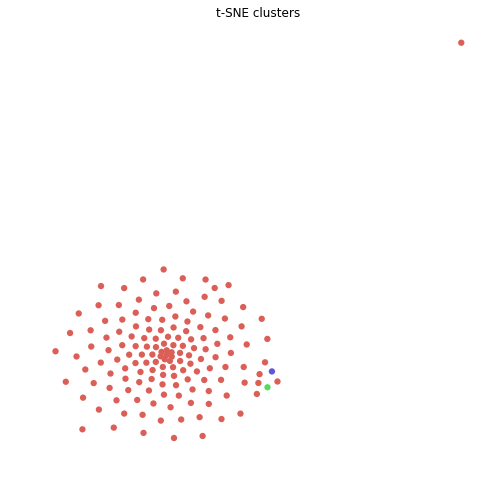

cluster counts: Counter({0: 149, 1: 1, 2: 1})


In [120]:
cluster_more(model_class_f10_p90_c356,KMeans(n_clusters=3),perplexity=2,n_iter=3000)

class_f10_p90_c337
unclustered count = 0
number of clusters = 3
sil score = -0.960252935862692
---------------------------
[t-SNE] Computing 7 nearest neighbors...
[t-SNE] Indexed 126 samples in 0.001s...
[t-SNE] Computed neighbors for 126 samples in 0.006s...
[t-SNE] Computed conditional probabilities for sample 126 / 126
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 94.196838
[t-SNE] Error after 1100 iterations: 2.605399


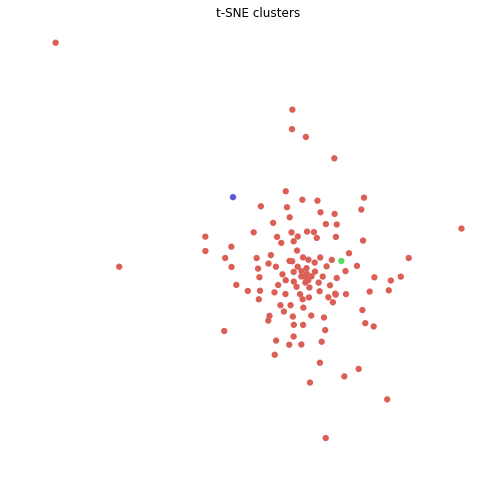

cluster counts: Counter({0: 124, 1: 1, 2: 1})


In [121]:
cluster_more(model_class_f10_p90_c337,KMeans(n_clusters=3),perplexity=2,n_iter=3000)

class_f10_p90_c629
class_f10_p90_c629
unclustered count = 1
number of clusters = 2
sil score = 4.444092998198354e-16
---------------------------
[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 316 samples in 0.001s...
[t-SNE] Computed neighbors for 316 samples in 0.031s...
[t-SNE] Computed conditional probabilities for sample 316 / 316
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 105.791687
[t-SNE] Error after 700 iterations: 2.636790


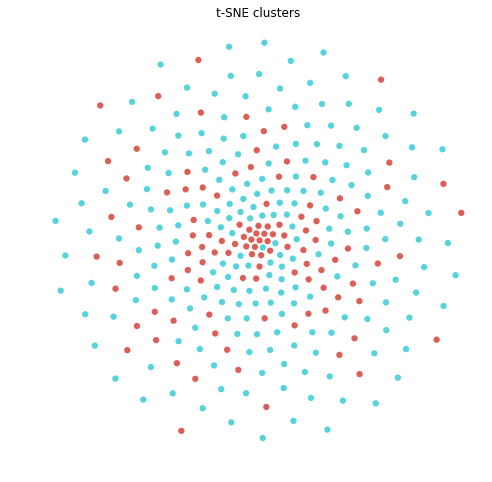

cluster counts: Counter({1: 208, 0: 108, -1: 1})
class_f10_p90_c395
class_f10_p90_c395
unclustered count = 18
number of clusters = 2
sil score = nan
---------------------------
[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 158 samples in 0.001s...
[t-SNE] Computed neighbors for 158 samples in 0.008s...
[t-SNE] Computed conditional probabilities for sample 158 / 158
[t-SNE] Mean sigma: 0.000000


/home/ubuntu/.local/lib/python3.5/site-packages/sklearn/metrics/cluster/unsupervised.py:205: RuntimeWarning: invalid value encountered in true_divide
  sil_samples /= np.maximum(intra_clust_dists, inter_clust_dists)


[t-SNE] KL divergence after 250 iterations with early exaggeration: 98.034248
[t-SNE] Error after 1350 iterations: 1.891944


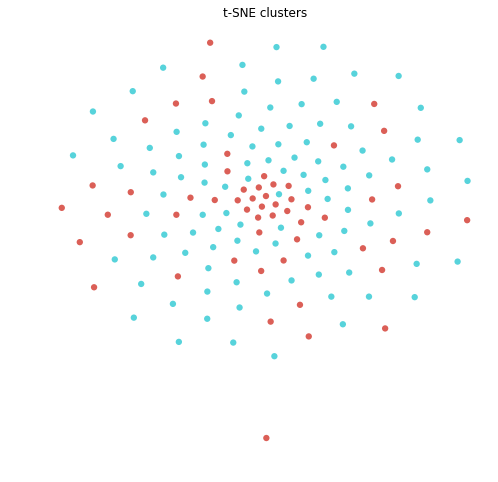

cluster counts: Counter({1: 102, 0: 56, -1: 18})
class_f10_p90_c356
class_f10_p90_c356
unclustered count = 6
number of clusters = 2
sil score = nan
---------------------------
[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 145 samples in 0.000s...
[t-SNE] Computed neighbors for 145 samples in 0.007s...
[t-SNE] Computed conditional probabilities for sample 145 / 145
[t-SNE] Mean sigma: 0.000000


/home/ubuntu/.local/lib/python3.5/site-packages/sklearn/metrics/cluster/unsupervised.py:205: RuntimeWarning: invalid value encountered in true_divide
  sil_samples /= np.maximum(intra_clust_dists, inter_clust_dists)


[t-SNE] KL divergence after 250 iterations with early exaggeration: 119.447296
[t-SNE] Error after 1200 iterations: 1.805478


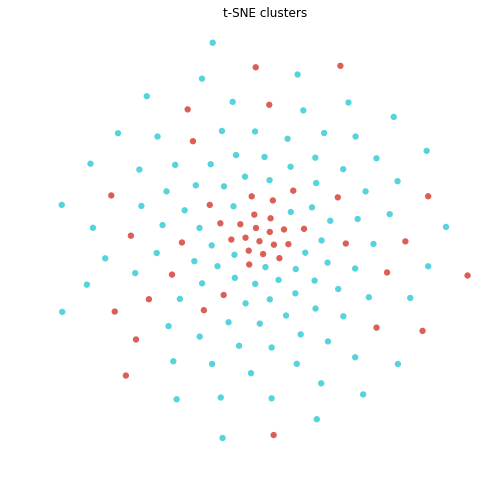

cluster counts: Counter({1: 100, 0: 45, -1: 6})
class_f10_p90_c337
class_f10_p90_c337
unclustered count = 4
number of clusters = 2
sil score = nan
---------------------------
[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 122 samples in 0.000s...
[t-SNE] Computed neighbors for 122 samples in 0.005s...
[t-SNE] Computed conditional probabilities for sample 122 / 122
[t-SNE] Mean sigma: 0.000000


/home/ubuntu/.local/lib/python3.5/site-packages/sklearn/metrics/cluster/unsupervised.py:205: RuntimeWarning: invalid value encountered in true_divide
  sil_samples /= np.maximum(intra_clust_dists, inter_clust_dists)


[t-SNE] KL divergence after 250 iterations with early exaggeration: 90.639030
[t-SNE] Error after 1200 iterations: 1.619874


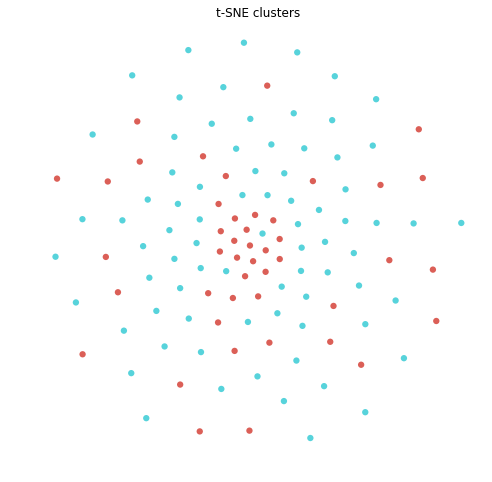

cluster counts: Counter({1: 77, 0: 45, -1: 4})


In [144]:
for model in [model_class_f10_p90_c629,
              model_class_f10_p90_c395,
              model_class_f10_p90_c356,
              model_class_f10_p90_c337]:
    print(model.name)
    cluster_more(model,hdbscan.HDBSCAN(min_cluster_size=2),perplexity=5,n_iter=3000)

Based on the above TSNE visualizations, it would appear that further clustering is not meaningful.

In [145]:
re.sub(r'[\']','',str([x for x in dir() if re.search(r'model_',x)!=None]))

'[model_class_f10_p90_c337, model_class_f10_p90_c356, model_class_f10_p90_c395, model_class_f10_p90_c629, model_class_filt10_pca50n, model_class_filt10_pca80, model_class_filt10_pca90, model_class_filt5_pca50n, model_class_filt5_pca80, model_class_filt5_pca90, model_superclass_filt10_pca50n, model_superclass_filt10_pca80, model_superclass_filt10_pca90, model_superclass_filt5_pca50n, model_superclass_filt5_pca80, model_superclass_filt5_pca90]'

In [146]:
for model in [model_class_f10_p90_c337, 
              model_class_f10_p90_c356, 
              model_class_f10_p90_c395, 
              model_class_f10_p90_c629, 
              model_class_filt10_pca50n, 
              model_class_filt10_pca80, 
              model_class_filt10_pca90, 
              model_class_filt5_pca50n, 
              model_class_filt5_pca80, 
              model_class_filt5_pca90, 
              model_superclass_filt10_pca50n, 
              model_superclass_filt10_pca80, 
              model_superclass_filt10_pca90, 
              model_superclass_filt5_pca50n, 
              model_superclass_filt5_pca80, 
              model_superclass_filt5_pca90]:
    model.to_pickle()